In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

In [3]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [4]:
#choosing a picutre for each class (number)
indexes = []
classes = []
for i in range(len(ytrain)):
    if ytrain[i] not in classes:
        classes.append(ytrain[i])
        indexes.append(i)


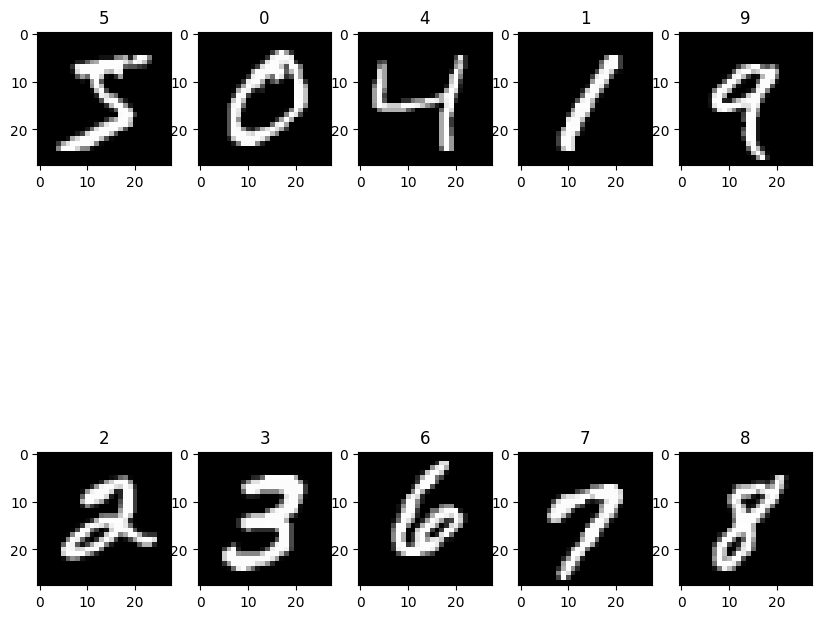

In [5]:
#ploting the pictures
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(xtrain[indexes[i]], cmap='gray')
    ax.set_title(ytrain[indexes[i]])
plt.show()

lets normilize and flatten the data first

In [6]:
#normalization
xtrain, xtest = xtrain/255, xtest/255
xtrain  = xtrain.reshape(-1,28*28)
xtest = xtest.reshape(-1,28*28)

The Labels are 0 to 9 numbers, so we need to one hot encode them

In [7]:
from sklearn.preprocessing import OneHotEncoder
ytrain_new = OneHotEncoder().fit_transform(ytrain.reshape(-1,1)).toarray()
ytest_new = OneHotEncoder().fit_transform(ytest.reshape(-1,1)).toarray()

In [8]:
ytrain_new.shape

(60000, 10)

In [39]:
#defining layers
inputs = keras.Input(28*28)
x = keras.layers.Dense(200, activation = 'relu')(inputs)
x = keras.layers.Dropout(0.1)(x)# to prevent overfitting
x = keras.layers.Dense(64, activation = 'relu')(x)
outputs = keras.layers.Dense(10, activation = 'softmax')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [13]:
# a summary of our model
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 170,514
Trainable params: 170,514
Non-trainable params: 0
_________________________________________________________________
None


# using SDG optimizer

In [40]:
# let's compile it with SGD − Stochastic gradient descent optimizer
optimizer = keras.optimizers.SGD(learning_rate = 0.01)
#optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(xtrain, ytrain_new, epochs=20, validation_data=(xtest, ytest_new))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6310 - accuracy: 0.8273 - val_loss: 0.3094 - val_accuracy: 0.9125
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3058 - accuracy: 0.9126 - val_loss: 0.2406 - val_accuracy: 0.9311
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2481 - accuracy: 0.9286 - val_loss: 0.2014 - val_accuracy: 0.9428
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2082 - accuracy: 0.9405 - val_loss: 0.1752 - val_accuracy: 0.9503
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1820 - accuracy: 0.9469 - val_loss: 0.1540 - val_accuracy: 0.9565
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1627 - accuracy: 0.9527 - val_loss: 0.1401 - val_accuracy: 0.9592
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1461 - accuracy: 0.9579 - val_loss: 0.1295 - val_accuracy:

Plotting matrices

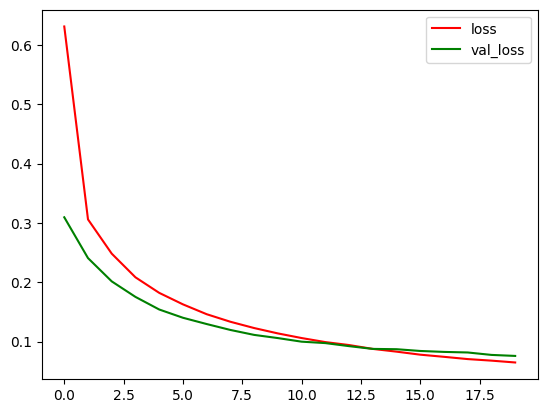

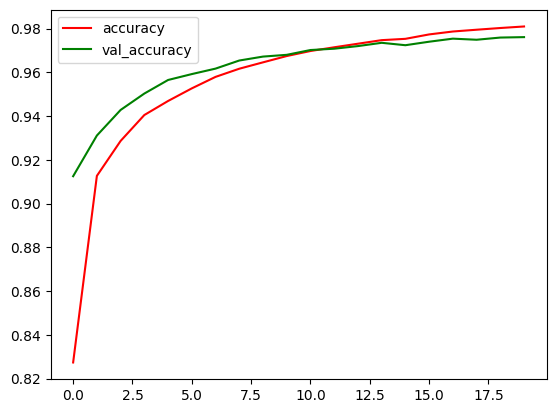

In [42]:
plt.plot(history.history['loss'], label = 'loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'val_loss', color = 'green')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'accuracy', color = 'red')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color = 'green')
plt.legend()
plt.show()

Evaluating the model by more metrices

In [43]:
from sklearn.metrics import classification_report

yhat_train = model.predict(xtrain).argmax(1)
yhat_test = model.predict(xtest).argmax(1)
print("For train data\n")
print(classification_report(ytrain, yhat_train))
print("For test data\n")
print(classification_report(ytest, yhat_test))

313/313 [==============================] - 1s 1ms/step
For train data

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.98      0.99      0.99      6742
           2       0.98      0.99      0.99      5958
           3       0.99      0.98      0.98      6131
           4       0.99      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       0.99      0.99      0.99      5918
           7       0.99      0.99      0.99      6265
           8       0.99      0.98      0.98      5851
           9       0.98      0.99      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

For test data

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99   

# using Adam optimizer

In [44]:
# let's compile it with Adam optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(xtrain, ytrain_new, epochs=20, validation_data=(xtest, ytest_new))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2828 - accuracy: 0.9184 - val_loss: 0.1659 - val_accuracy: 0.9539
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2058 - accuracy: 0.9423 - val_loss: 0.1582 - val_accuracy: 0.9570
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1893 - accuracy: 0.9490 - val_loss: 0.1838 - val_accuracy: 0.9553
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1715 - accuracy: 0.9542 - val_loss: 0.1767 - val_accuracy: 0.9562
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1637 - accuracy: 0.9577 - val_loss: 0.1674 - val_accuracy: 0.9615
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1522 - accuracy: 0.9607 - val_loss: 0.1469 - val_accuracy: 0.9642
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1501 - accuracy: 0.9633 - val_loss: 0.1426 - val_accuracy:

Plotting matrices

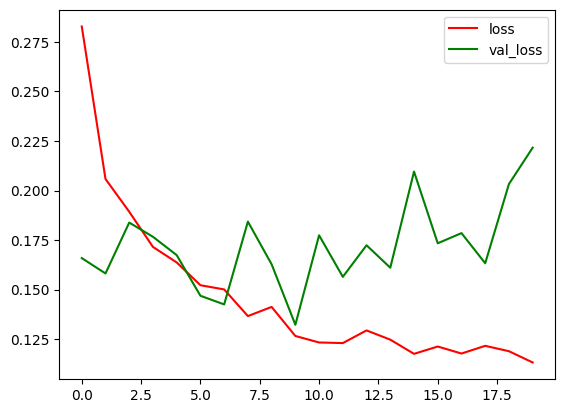

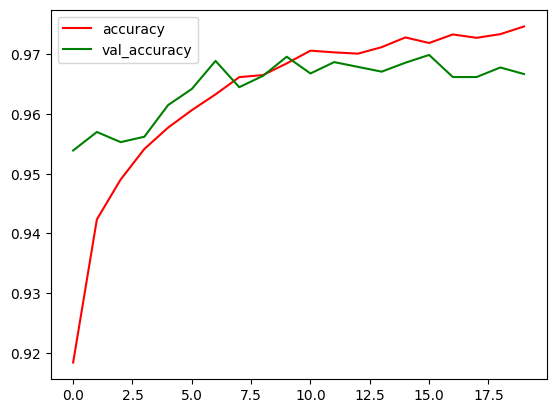

In [46]:
plt.plot(history.history['loss'], label = 'loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'val_loss', color = 'green')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'accuracy', color = 'red')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color = 'green')
plt.legend()
plt.show()

# But what if we dont use Dropout layer

In [33]:
#defining layers
inputs = keras.Input(28*28)
x = keras.layers.Dense(200, activation = 'relu')(inputs)
x = keras.layers.Dense(64, activation = 'relu')(x)
outputs = keras.layers.Dense(10, activation = 'softmax')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

I used SGD optimizer, you can change it

In [34]:
# let's compile it with SGD − Stochastic gradient descent optimizer
optimizer = keras.optimizers.SGD(learning_rate = 0.01)
#optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(xtrain, ytrain_new, epochs=20, validation_data=(xtest, ytest_new))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0975 - accuracy: 0.9721 - val_loss: 0.1083 - val_accuracy: 0.9686
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0902 - accuracy: 0.9746 - val_loss: 0.1010 - val_accuracy: 0.9695
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9760 - val_loss: 0.0952 - val_accuracy: 0.9713
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0776 - accuracy: 0.9777 - val_loss: 0.0929 - val_accuracy: 0.9725
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0723 - accuracy: 0.9794 - val_loss: 0.0904 - val_accuracy: 0.9733
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9811 - val_loss: 0.0876 - val_accuracy: 0.9729
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0633 - accuracy: 0.9821 - val_loss: 0.0853 - val_accuracy:

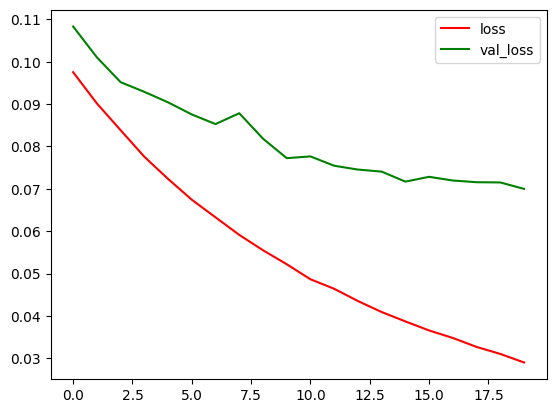

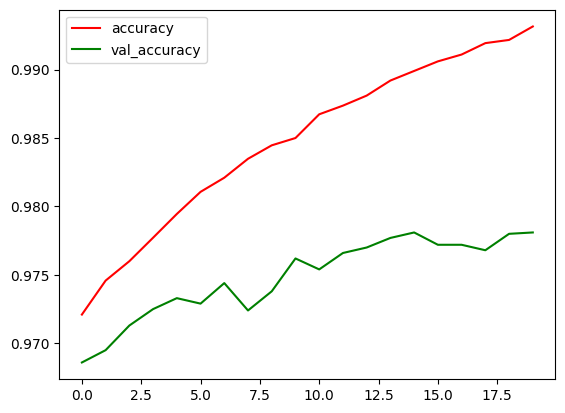

In [38]:
plt.plot(history.history['loss'], label = 'loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'val_loss', color = 'green')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'accuracy', color = 'red')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color = 'green')
plt.legend()
plt.show()

# Because our model is not that deep and our data is big enough to train it, it wont overfit so dropout layer isn't nessesery

# And at the end lets classify my own handwritten numbers

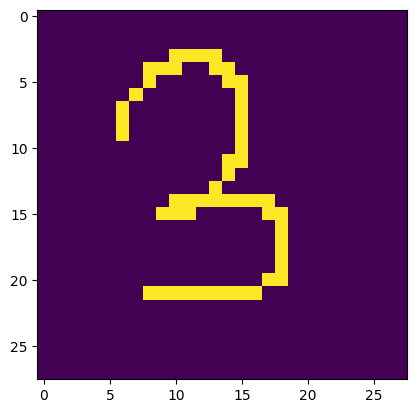

In [211]:
import cv2
img=cv2.imread('sample_data/pic1.png', 0)
plt.imshow(img)

In [212]:
img = img/255
img = img.reshape(-1,28*28)

# Testing the cake using CNN layers

In [190]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)



batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/3
422/422 [==============================] - 29s 68ms/step - loss: 0.3697 - accuracy: 0.8883 - val_loss: 0.0815 - val_accuracy: 0.9767
Epoch 2/3
422/422 [==============================] - 30s 71ms/step - loss: 0.1098 - accuracy: 0.9668 - val_loss: 0.0530 - val_accuracy: 0.9863
Epoch 3/3
422/422 [==============================] - 29s 68ms/step - loss: 0.0828 - accuracy: 0.9743 - val_loss: 0.0482 - val_accuracy: 0.9868


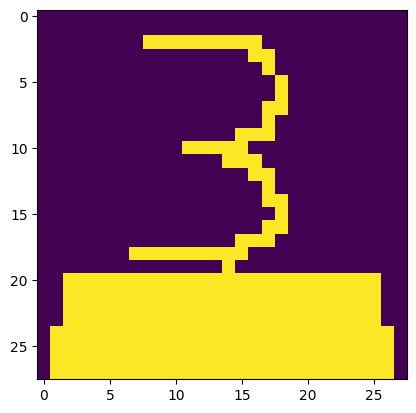

In [207]:
import cv2
img=cv2.imread('pic2.png', 0)
plt.imshow(img)

In [208]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

(1, 28, 28, 1)


In [209]:
result = model.predict(img).argmax(1)
print(result)

1/1 [==============================] - 0s 21ms/step
[3]
